# **Import libraries**

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import warnings 
warnings.filterwarnings("ignore")
df=pd.read_csv("/kaggle/input/ad-click-prediction-dataset/ad_click_dataset.csv")
print(df.info())
print(df.isnull().sum())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.2+ KB
None
id                     0
full_name              0
age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64
     id full_name   age      gender device_type ad_position browsing_

In [2]:

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")

Unique values in column 'id':
[ 670 3044 5912 ... 7843 3914 3056]


Unique values in column 'full_name':
['User670' 'User3044' 'User5912' ... 'User7843' 'User3914' 'User3056']


Unique values in column 'age':
[22. nan 41. 34. 39. 26. 40. 47. 19. 56. 24. 52. 42. 36. 43. 62. 45. 37.
 31. 58. 59. 48. 38. 49. 30. 46. 54. 44. 27. 57. 28. 51. 25. 61. 32. 64.
 23. 55. 21. 20. 35. 53. 33. 29. 63. 50. 18. 60.]


Unique values in column 'gender':
[nan 'Male' 'Non-Binary' 'Female']


Unique values in column 'device_type':
['Desktop' nan 'Mobile' 'Tablet']


Unique values in column 'ad_position':
['Top' 'Side' nan 'Bottom']


Unique values in column 'browsing_history':
['Shopping' nan 'Education' 'Entertainment' 'Social Media' 'News']


Unique values in column 'time_of_day':
['Afternoon' nan 'Night' 'Evening' 'Morning']


Unique values in column 'click':
[1 0]




In [3]:

age_imputer = SimpleImputer(strategy='mean')
df['age'] = age_imputer.fit_transform(df[['age']])


categorical_columns = ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']
categorical_imputer = SimpleImputer(strategy='most_frequent')

df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

print(df.isnull().sum())
print(df.head())

id                  0
full_name           0
age                 0
gender              0
device_type         0
ad_position         0
browsing_history    0
time_of_day         0
click               0
dtype: int64
     id full_name        age      gender device_type ad_position  \
0   670   User670  22.000000      Female     Desktop         Top   
1  3044  User3044  40.197363        Male     Desktop         Top   
2  5912  User5912  41.000000  Non-Binary     Desktop        Side   
3  5418  User5418  34.000000        Male     Desktop      Bottom   
4  9452  User9452  39.000000  Non-Binary     Desktop      Bottom   

  browsing_history time_of_day  click  
0         Shopping   Afternoon      1  
1    Entertainment     Morning      1  
2        Education       Night      1  
3    Entertainment     Evening      1  
4     Social Media     Morning      0  


In [4]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")

Unique values in column 'id':
[ 670 3044 5912 ... 7843 3914 3056]


Unique values in column 'full_name':
['User670' 'User3044' 'User5912' ... 'User7843' 'User3914' 'User3056']


Unique values in column 'age':
[22.         40.19736339 41.         34.         39.         26.
 40.         47.         19.         56.         24.         52.
 42.         36.         43.         62.         45.         37.
 31.         58.         59.         48.         38.         49.
 30.         46.         54.         44.         27.         57.
 28.         51.         25.         61.         32.         64.
 23.         55.         21.         20.         35.         53.
 33.         29.         63.         50.         18.         60.        ]


Unique values in column 'gender':
['Female' 'Male' 'Non-Binary']


Unique values in column 'device_type':
['Desktop' 'Mobile' 'Tablet']


Unique values in column 'ad_position':
['Top' 'Side' 'Bottom']


Unique values in column 'browsing_history':
['Shopping' '

In [5]:
print(df.describe(include=[float, int]))  # Summary statistics for numerical columns
print(df.describe(include=[object]))  # Summary statistics for categorical columns


                 id           age         click
count  10000.000000  10000.000000  10000.000000
mean    5060.211400     40.197363      0.650000
std     2861.758265      9.496059      0.476993
min        5.000000     18.000000      0.000000
25%     2529.000000     38.000000      0.000000
50%     5218.000000     40.197363      1.000000
75%     7466.000000     40.197363      1.000000
max    10000.000000     64.000000      1.000000
       full_name  gender device_type ad_position browsing_history time_of_day
count      10000   10000       10000       10000            10000       10000
unique      4000       3           3           3                5           4
top     User1171  Female     Desktop      Bottom    Entertainment     Morning
freq          25    6527        4754        4817             5957        4126


# **EDA**

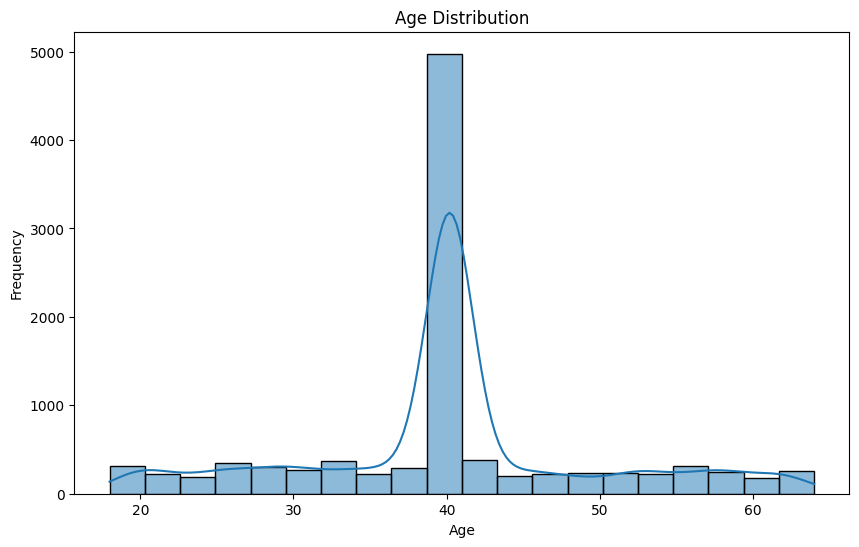

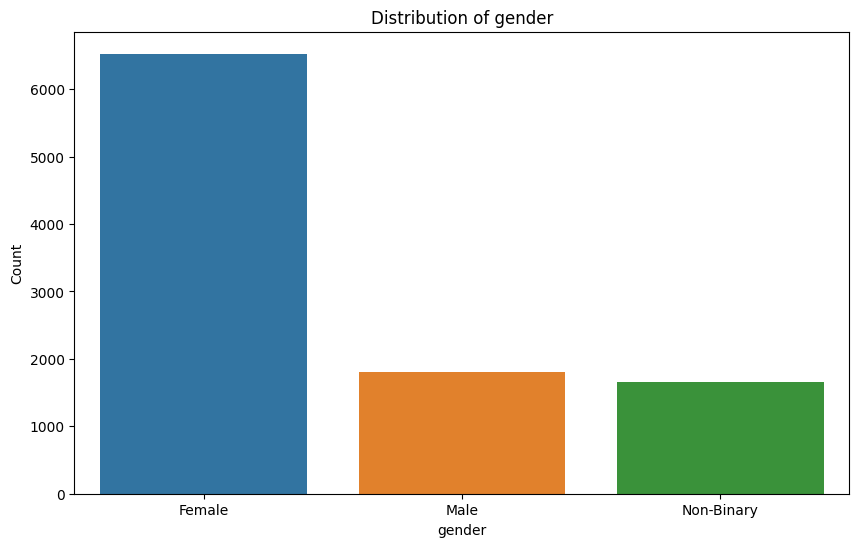

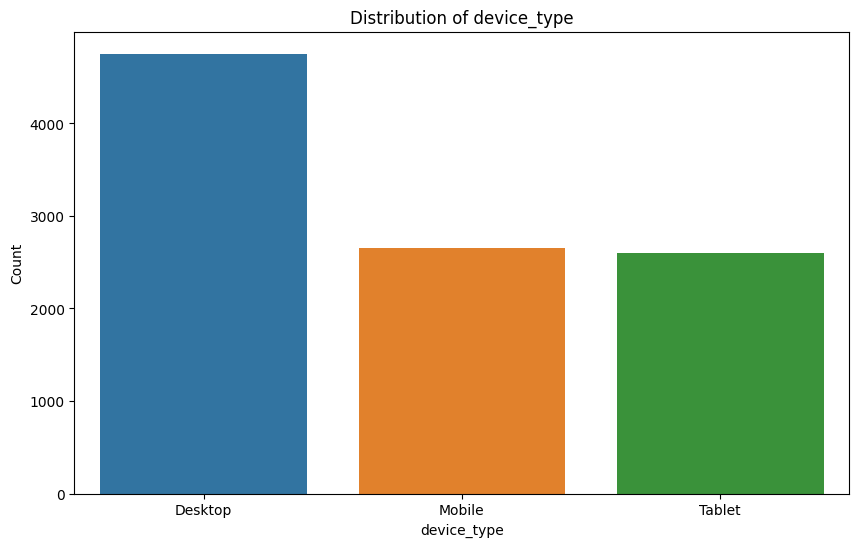

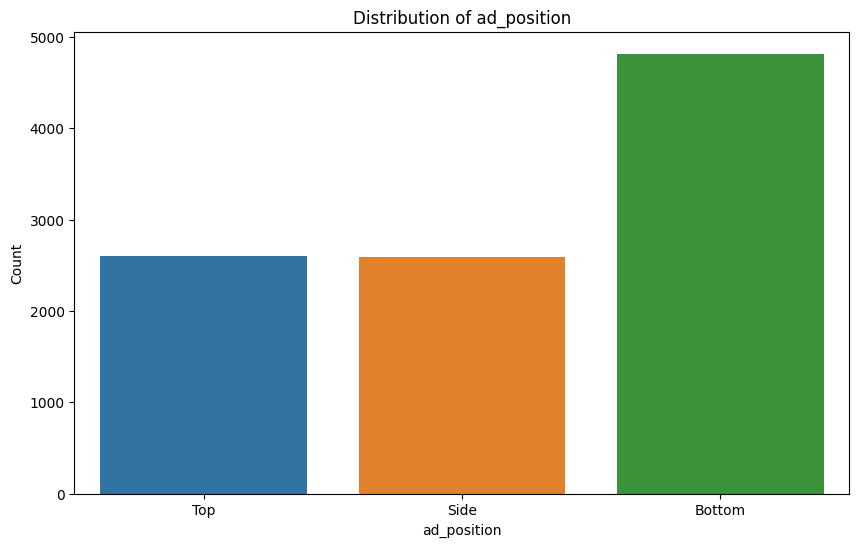

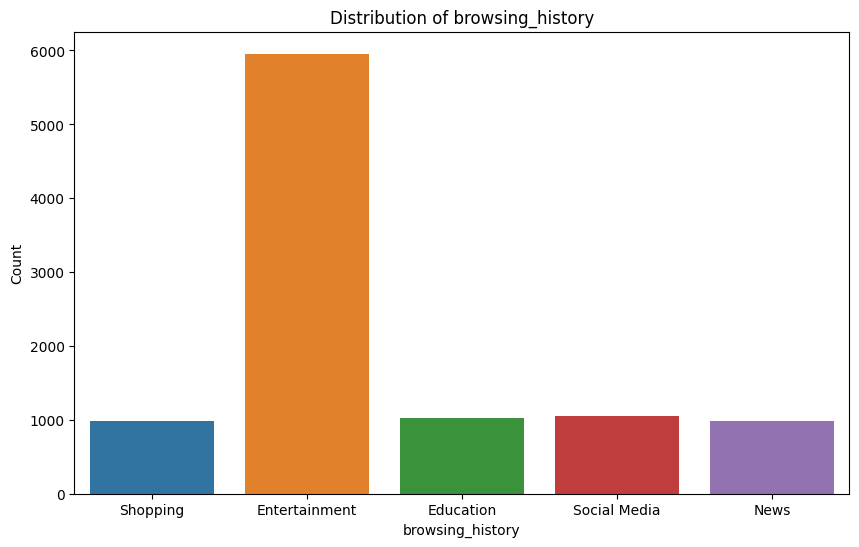

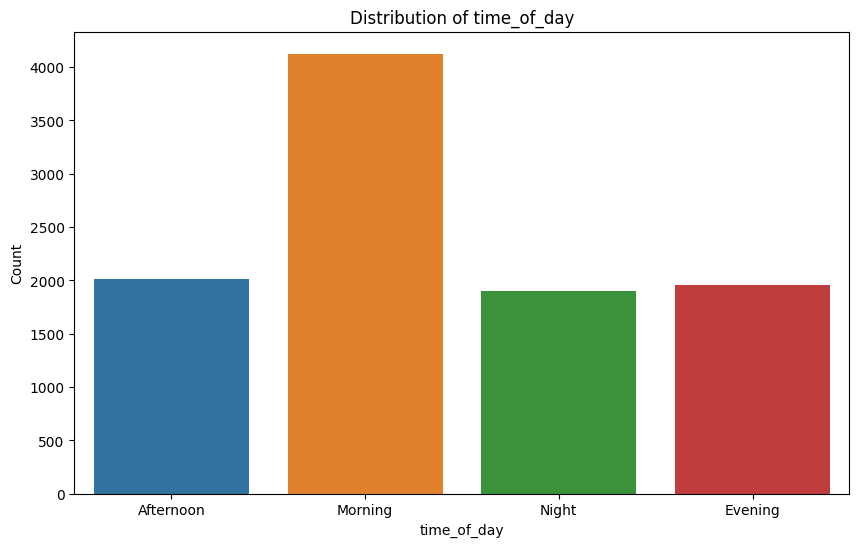

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


categorical_features = ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


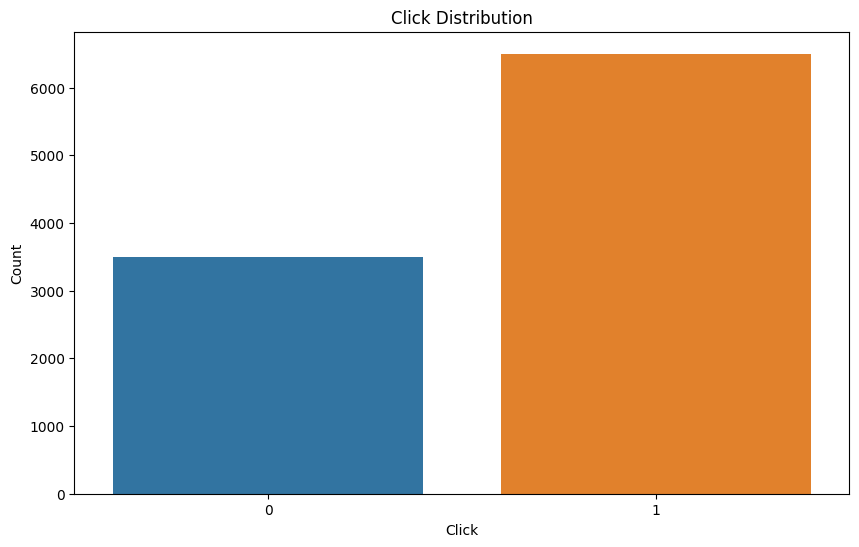

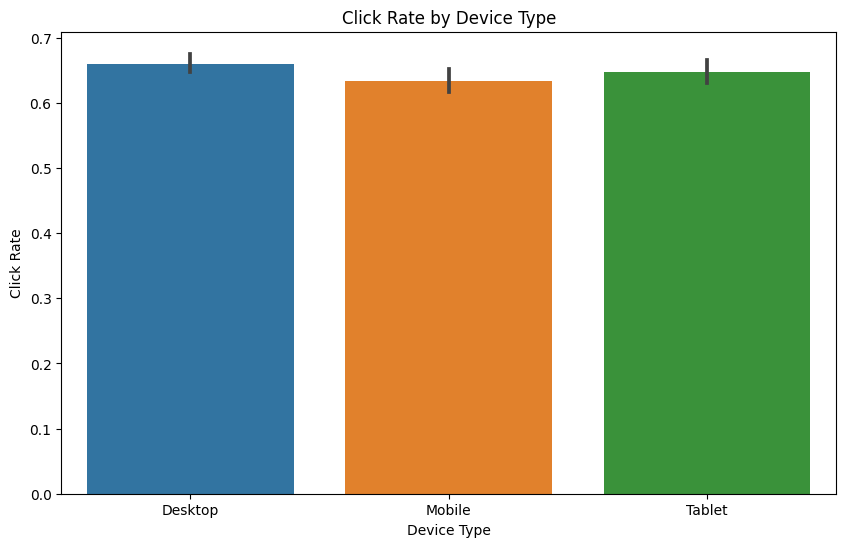

In [7]:

plt.figure(figsize=(10, 6))
sns.countplot(x='click', data=df)
plt.title('Click Distribution')
plt.xlabel('Click')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='device_type', y='click', data=df, estimator='mean')
plt.title('Click Rate by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Click Rate')
plt.show()


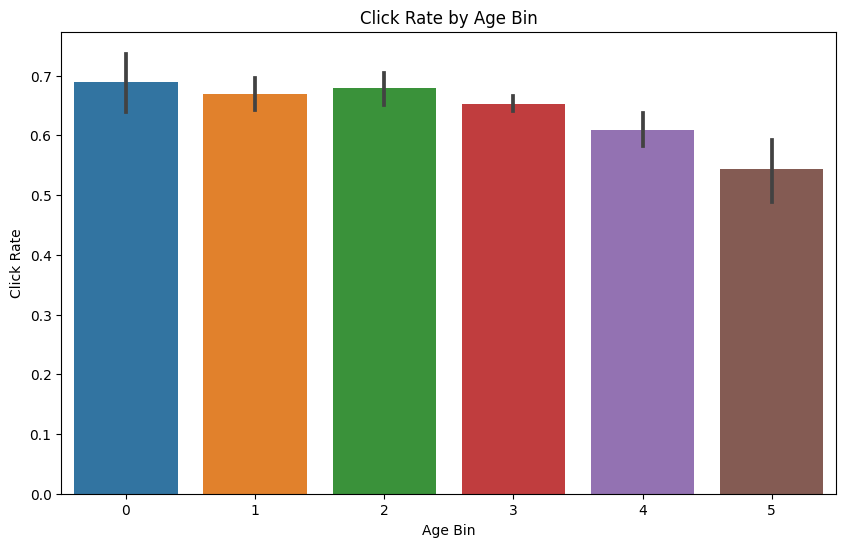

In [8]:
df['age_bin'] = pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='age_bin', y='click', data=df, estimator='mean')
plt.title('Click Rate by Age Bin')
plt.xlabel('Age Bin')
plt.ylabel('Click Rate')
plt.show()


# **Models**

In [9]:

df_encoded = pd.get_dummies(df, columns=['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day'], drop_first=True)



              precision    recall  f1-score   support

           0       0.65      0.43      0.52       705
           1       0.74      0.88      0.80      1295

    accuracy                           0.72      2000
   macro avg       0.70      0.65      0.66      2000
weighted avg       0.71      0.72      0.70      2000

Accuracy: 0.7185


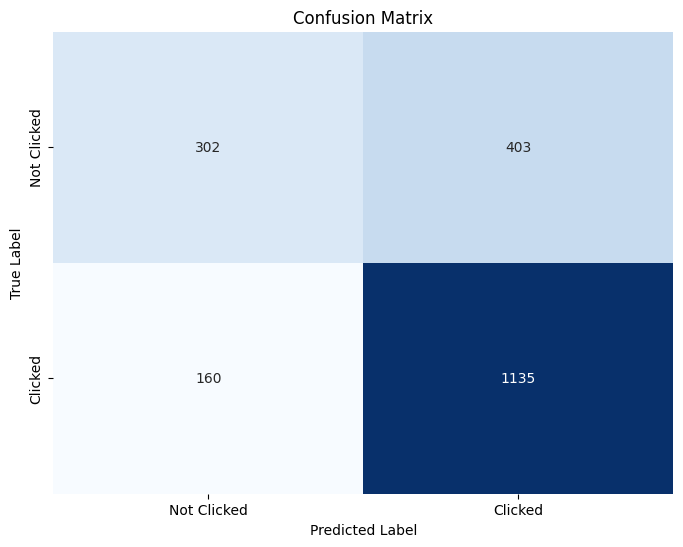

In [10]:
X = df_encoded.drop(['click', 'id', 'full_name'], axis=1)
y = df_encoded['click']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Clicked', 'Clicked'], yticklabels=['Not Clicked', 'Clicked'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


              precision    recall  f1-score   support

           0       0.63      0.38      0.47       705
           1       0.72      0.88      0.79      1295

    accuracy                           0.70      2000
   macro avg       0.68      0.63      0.63      2000
weighted avg       0.69      0.70      0.68      2000

Accuracy: 0.7025


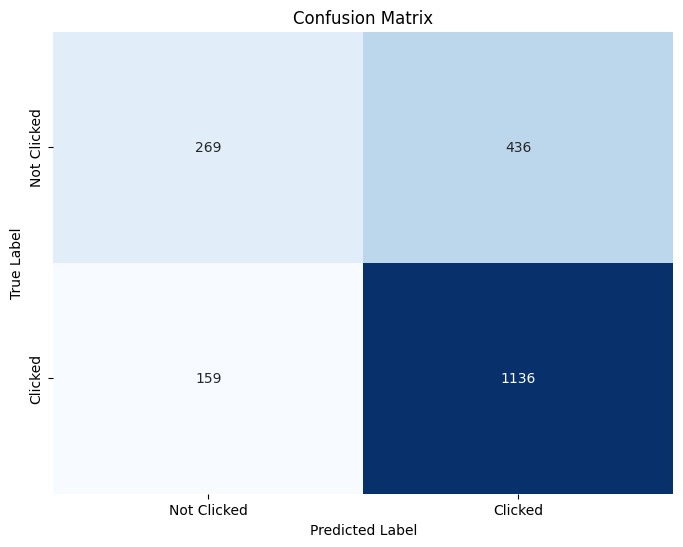

In [11]:

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Clicked', 'Clicked'], yticklabels=['Not Clicked', 'Clicked'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
